<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/TFLite%20quantisation%20exploration%20with%20Binary%20Clasification_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M.Tech(DS) 2020-22 (20-21(Even))**

**Assignment - 2 - 20DS616 Computer Networks and Internet of Things**


**Submitted on: 12.05.2021.**

***Theivaprakasham H- CB.EN.P2CEN20026***

This IPython Notebook is compatible with Direct Google Colab Execution. 

Please Change the **RUNTIME** to **GPU** for Faster Training time and execution.

You can select Run All to Run all the cells.

In [ ]:
!nvidia-smi

Wed May 12 07:54:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    35W / 250W |   9033MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow

In [ ]:
#Downloading the Dataset and Upzipping them from My dropbox storage

!wget "https://dl.dropboxusercontent.com/s/3qpxvpkmc7j9srm/Dataset-20210414T105005Z-001.zip"
!unzip -qq "Dataset-20210414T105005Z-001.zip"

--2021-05-12 07:42:46--  https://dl.dropboxusercontent.com/s/3qpxvpkmc7j9srm/Dataset-20210414T105005Z-001.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:6018:15::a27d:30f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.3.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298488 (166M) [application/zip]
Saving to: ‘Dataset-20210414T105005Z-001.zip’

Dataset-20210414T10 100%[===================>] 166.22M  90.5MB/s    in 1.8s    

2021-05-12 07:42:49 (90.5 MB/s) - ‘Dataset-20210414T105005Z-001.zip’ saved [174298488/174298488]



In [ ]:
#Importing required Libraries

import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, AveragePooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
#Path for Training and Testing

train_dataset_path = "/content/Dataset/training_set"
test_dataset_path = "/content/Dataset/test_set"

In [ ]:
#Creating Training, Validation and testing Datasets

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dataset_path,
  validation_split=0.2,
  subset='training',
  seed=42,
  image_size=(224,224),
  batch_size=64)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dataset_path,
  seed=42,
  validation_split=0.2,
  subset='validation',
  image_size=(224,224),
  batch_size=64)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset_path,
  seed=42,
  image_size=(224,224),
  batch_size=64)

Found 5319 files belonging to 2 classes.
Using 4256 files for training.
Found 5319 files belonging to 2 classes.
Using 1063 files for validation.
Found 2032 files belonging to 2 classes.


In [ ]:
#Names of the classes in the Dataset
train_ds.class_names

['cats', 'dogs']

In [ ]:
classes = train_ds.class_names

In [ ]:
#Caching the images to GPU for faster training time
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

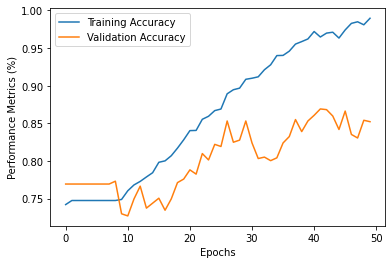

In [ ]:
''' Custom Model with more Conv Layers '''

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

  Conv2D(filters=32, kernel_size=(3,3),  strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=512, kernel_size=(2,2), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=2048, kernel_size=(2,2), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  
  Dense(2, activation='softmax')
])

#Compiling the model with Optimizer, Loss Function and Metrics

model.compile(optimizer=tf.optimizers.Adam(0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Printing the model summary
model.summary()

#Training the model
datalogger = model.fit(train_ds, epochs=50, validation_data=valid_ds)

#Plotting the results of Training and Validation Accuracy
plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

In [ ]:
#We are creating a Representative data from our dataset to extract the various parameters
#namely Mean, Standard Deviation for optimising the model with INT8 Quantization

#From Batch 1 of Training Dataset, we take 100 samples images for Extracting features needed for qunatization
def representative_dataset():
  for image_batch, labels_batch in train_ds.batch(1).take(100):
    yield [image_batch[0]]

In [ ]:
# We are trying to convert the Keras model to TFlite version
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Passing the representative_dataset to TFlite converter
converter.representative_dataset = representative_dataset

#Setting the INT8 Specifications to our converter
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Set the input and output tensors to uint8
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

#Converting the Keras model to TFLITE INT8 Qunatized model
tflite_model_quant = converter.convert()

# Saving the model
with open('Q1_model.tflite', 'wb') as f:
  f.write(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmplpg7t970/assets


In [ ]:
#To verfiy the working and the specification of the converted model, we use TFLite Interpreter

interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)

#Getting the details of the TFlite models Input Type

input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)

#Getting the details of the TFlite models Output Type
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


--2021-05-12 07:51:18--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-girl-cat-names-1606245046.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190368 (186K) [image/jpeg]
Saving to: ‘best-girl-cat-names-1606245046.jpg’

best-girl-cat-names 100%[===================>] 185.91K  --.-KB/s    in 0.02s   

2021-05-12 07:51:19 (7.50 MB/s) - ‘best-girl-cat-names-1606245046.jpg’ saved [190368/190368]



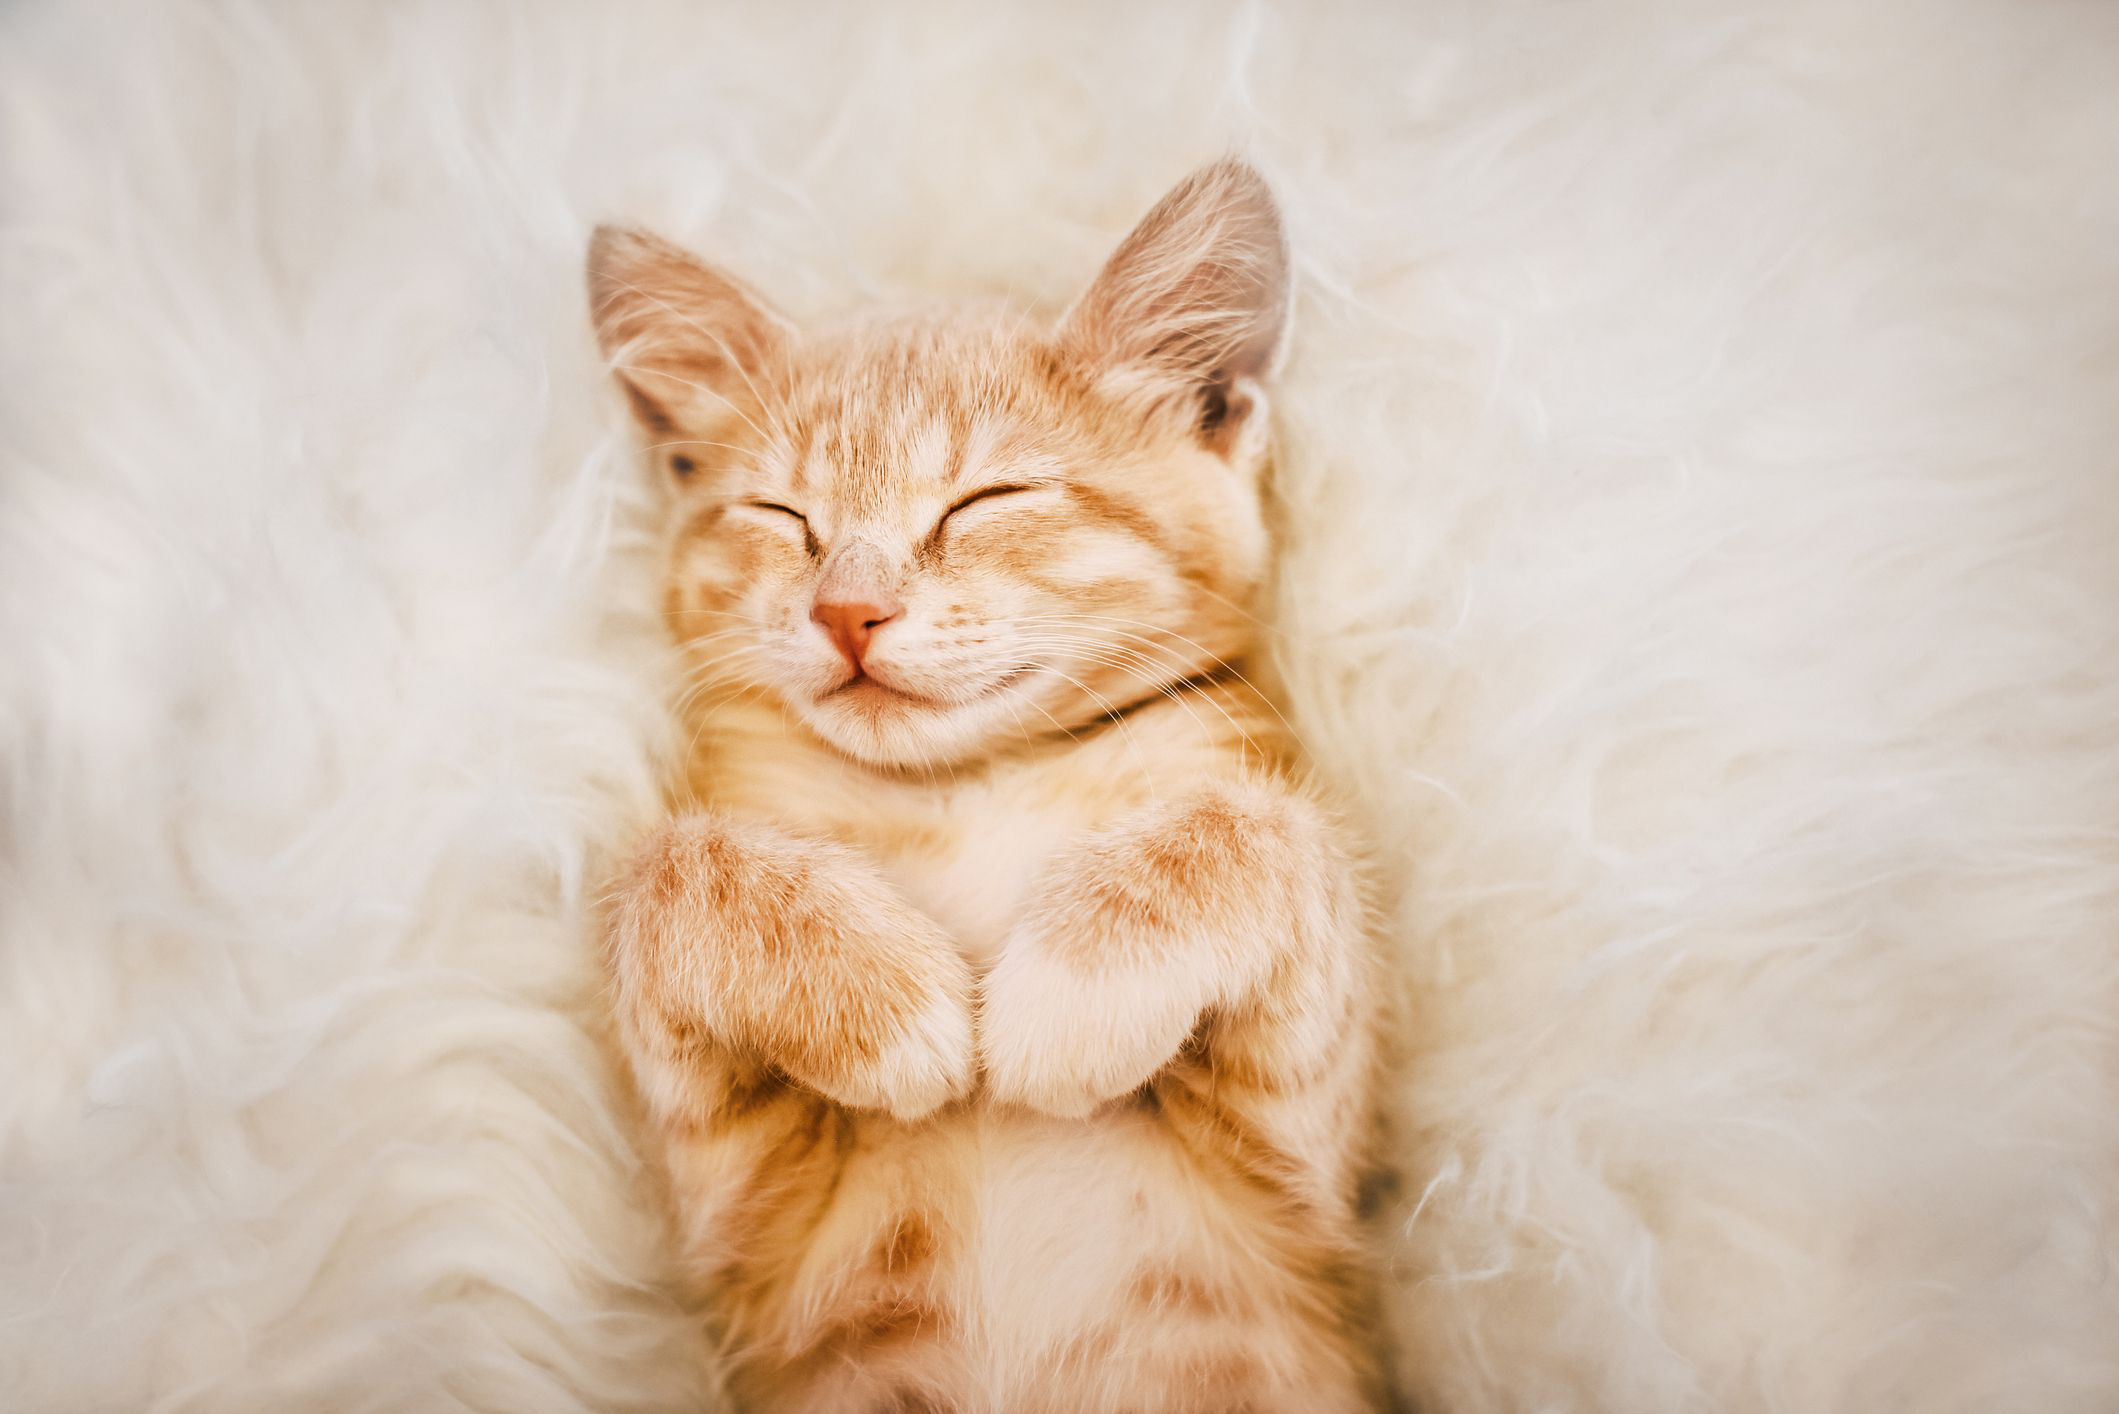

In [ ]:
#Downloading a random Cat Images from Internet
!wget "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-girl-cat-names-1606245046.jpg"

#Displaying the Downloaded a random Cat Images from Internet
Image.open("best-girl-cat-names-1606245046.jpg")

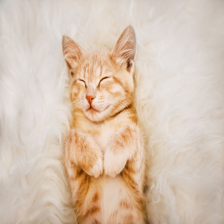

In [ ]:
#Resizing the Image to 224x224px
Image.open("best-girl-cat-names-1606245046.jpg").resize((224, 224))

In [ ]:
#Saving the Resized image to a variable called test_image

test_image = Image.open("best-girl-cat-names-1606245046.jpg").resize((224, 224))

In [ ]:
# Initialize the interpreter
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

In [ ]:
#Extracting the Input details from TFLite Model

input_scale, input_zero_point = input_details["quantization"]

In [ ]:
input_scale

1.0

In [ ]:
input_zero_point

0

In [ ]:
#We normalize the image as expected format by Input layer TFlite model

test_image = np.array(test_image) / input_scale + input_zero_point

In [ ]:
test_image.shape

(224, 224, 3)

In [ ]:
#Expanding the dimension as required by TF Interpretor
test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
test_image.shape

(1, 224, 224, 3)

In [ ]:
# We input the input of TFLite model with our Input Image
interpreter.set_tensor(input_details["index"], test_image)

# Predicting the Image class by Forward Pass
interpreter.invoke()

#Storing the output value from the output layer
output = interpreter.get_tensor(output_details["index"])[0]

print("Output from TFLite model: ", output)

print("The predicted class is ", classes[output.argmax()])

Output from TFLite model:  [251   5]
The predicted class is  cats


In [ ]:
#We Tested our model with Random Cat Image... Let try for a random Dog image from Internet too...

--2021-05-12 07:51:22--  https://thegarnetmine.com/wp-content/uploads/2021/04/Dog.jpeg
Resolving thegarnetmine.com (thegarnetmine.com)... 104.21.88.43, 172.67.172.136, 2606:4700:3032::6815:582b, ...
Connecting to thegarnetmine.com (thegarnetmine.com)|104.21.88.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32583 (32K) [image/jpeg]
Saving to: ‘Dog.jpeg’

Dog.jpeg            100%[===================>]  31.82K  --.-KB/s    in 0.002s  

2021-05-12 07:51:22 (14.6 MB/s) - ‘Dog.jpeg’ saved [32583/32583]



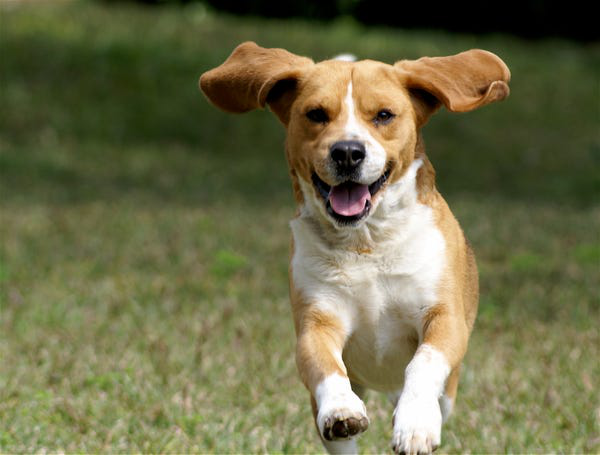

In [ ]:
#Downloading a random Dog Images from Internet
!wget "https://thegarnetmine.com/wp-content/uploads/2021/04/Dog.jpeg"

#Displaying the Downloaded a random Dog Images from Internet
Image.open("Dog.jpeg")

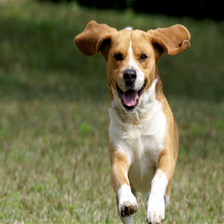

In [ ]:
#Resizing the Image to 224x224px
Image.open("Dog.jpeg").resize((224, 224))

In [ ]:
#Saving the Resized image to a variable called test_image

test_image = Image.open("Dog.jpeg").resize((224, 224))

In [ ]:
# Initialize the interpreter
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]


#Extracting the Input details from TFLite Model
input_scale, input_zero_point = input_details["quantization"]


#We normalize the image as expected format by Input layer TFlite model
test_image = np.array(test_image) / input_scale + input_zero_point


#Expanding the dimension as required by TF Interpretor
test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])


# We input the input of TFLite model with our Input Image
interpreter.set_tensor(input_details["index"], test_image)

# Predicting the Image class by Forward Pass
interpreter.invoke()

#Storing the output value from the output layer
output = interpreter.get_tensor(output_details["index"])[0]

print("Output from TFLite model: ", output)

print("The predicted class is ", classes[output.argmax()])

Output from TFLite model:  [  0 255]
The predicted class is  dogs


**We have sucessfully created a TFlite model for Cats and Dogs Classification and also tested it for random images**.


***Theivaprakasham H- CB.EN.P2CEN20026***